In [178]:
import pandas as pd
df = pd.read_csv('/content/heartdisease(1).csv')

DATA CLEANING

In [179]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [196]:
df.dropna(inplace = True, axis = 0)

In [197]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [182]:
df.duplicated().sum()

np.int64(0)

In [183]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


DATA INTEGRATION

In [184]:
subset_1 = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
subset_2 = ['ChestPain', 'Thal']

In [185]:
merged_df = pd.concat([df[subset_1], df[subset_2]], axis = 1)

In [186]:
merged_df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain,Thal
0,63,1,145,233,1,2,150,0,2.3,3,0.0,typical,fixed
1,67,1,160,286,0,2,108,1,1.5,2,3.0,asymptomatic,normal
2,67,1,120,229,0,2,129,1,2.6,2,2.0,asymptomatic,reversable
3,37,1,130,250,0,0,187,0,3.5,3,0.0,nonanginal,normal
4,41,0,130,204,0,2,172,0,1.4,1,0.0,nontypical,normal


ERROR CORRECTION

In [187]:
df['Fbs'].value_counts()

,count
Fbs,
0,254
1,43


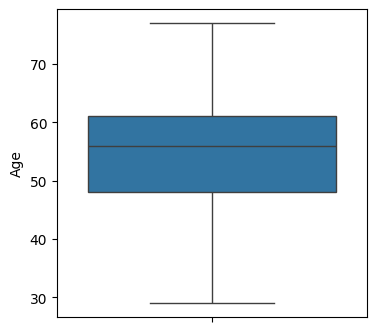

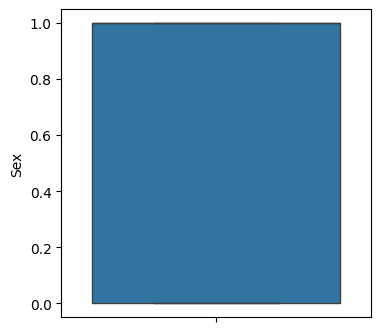

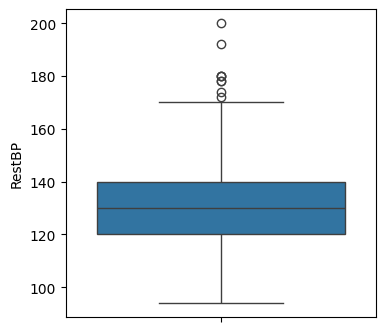

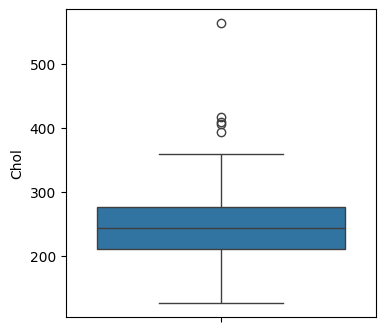

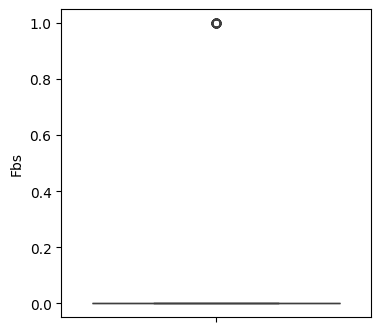

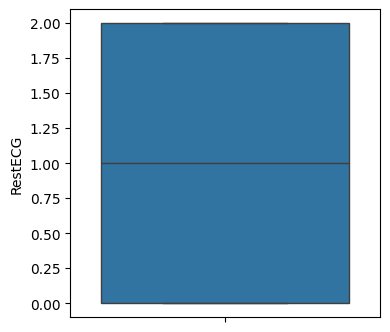

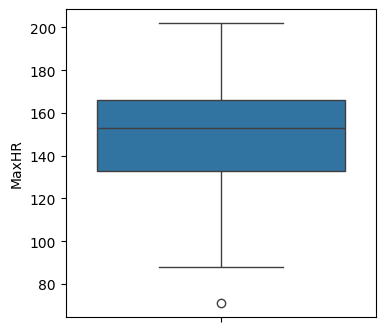

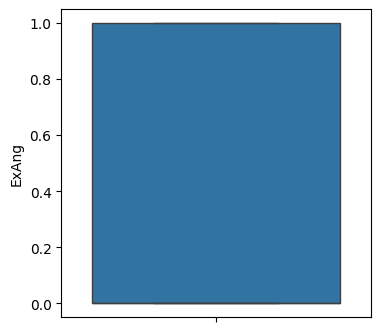

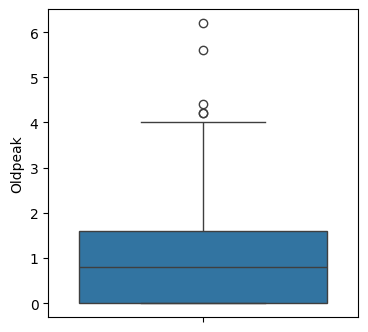

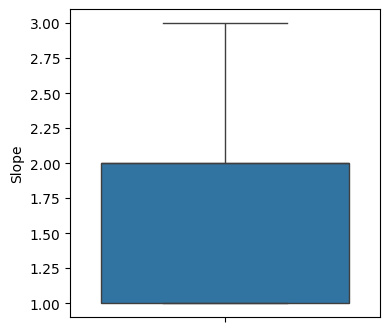

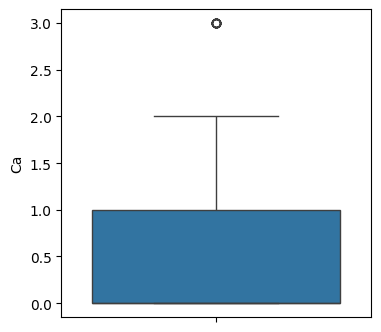

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in subset_1:
  plt.figure(figsize = (4,4))
  sns.boxplot(df[i])
  plt.show()

In [189]:
import numpy as np

In [190]:
def remove_outlier(column):
  q1 = column.quantile(0.25)
  q2 = column.quantile(0.75)
  iqr = q2-q1
  threshold = 1.5 * iqr
  outlier = np.logical_or(column < ( q1 - threshold) , column > (q2 + threshold))
  return column[~outlier]

In [191]:
for col in subset_1:
  df[col] = remove_outlier(df[col])

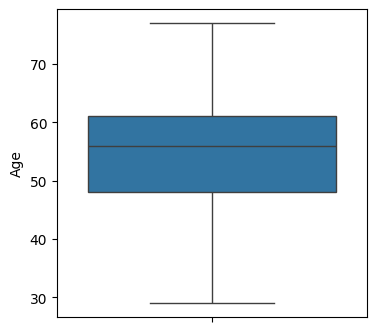

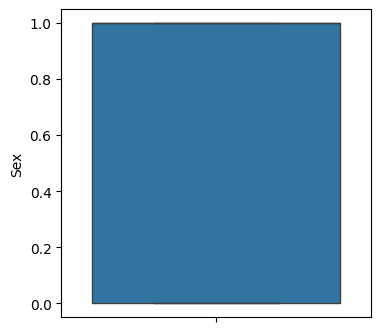

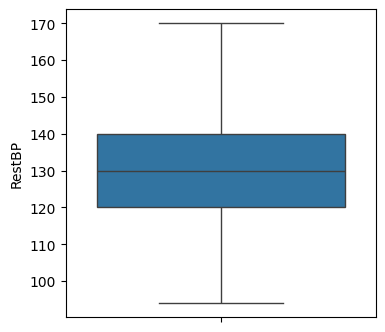

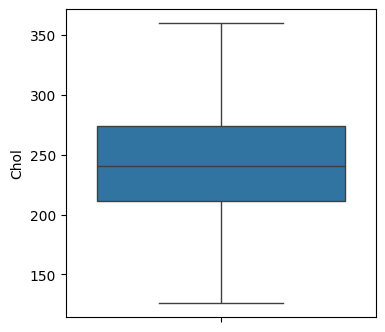

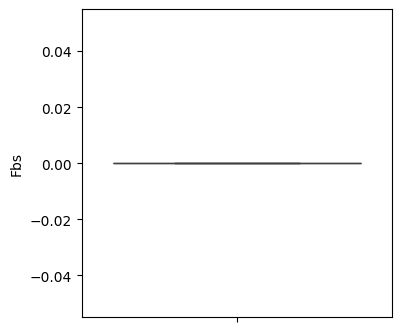

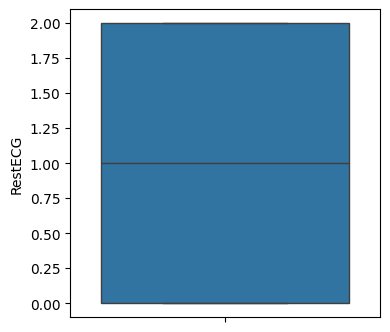

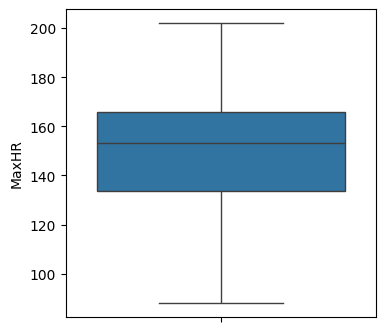

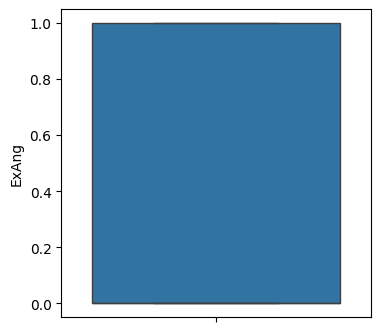

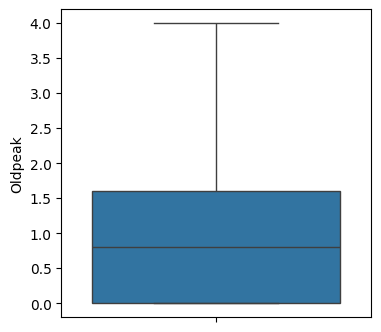

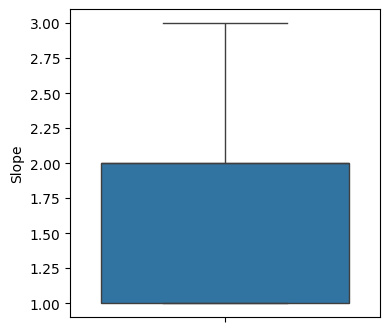

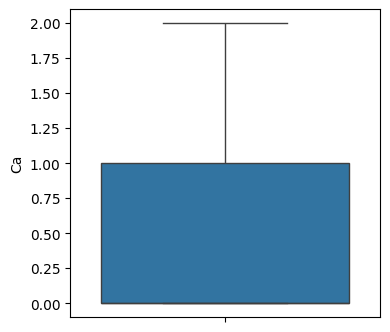

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in subset_1:
  plt.figure(figsize = (4,4))
  sns.boxplot(df[i])
  plt.show()

In [198]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


DATA TRANSFORMATION

In [134]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145.0,233.0,NaN,2,150.0,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160.0,286.0,0.0,2,108.0,1,1.5,2,NaN,normal,Yes
2,3,67,1,asymptomatic,120.0,229.0,0.0,2,129.0,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130.0,250.0,0.0,0,187.0,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130.0,204.0,0.0,2,172.0,0,1.4,1,0.0,normal,No


In [135]:
subset_3 = ['ChestPain', 'Thal']
subset_4 = ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']

In [199]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['AHD']

In [200]:
X.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
2,3,67,1,asymptomatic,120.0,229.0,0.0,2,129.0,1,2.6,2,2.0,reversable
3,4,37,1,nonanginal,130.0,250.0,0.0,0,187.0,0,3.5,3,0.0,normal
4,5,41,0,nontypical,130.0,204.0,0.0,2,172.0,0,1.4,1,0.0,normal
5,6,56,1,nontypical,120.0,236.0,0.0,0,178.0,0,0.8,1,0.0,normal
6,7,62,0,asymptomatic,140.0,268.0,0.0,2,160.0,0,3.6,3,2.0,normal


In [201]:
X.isnull().sum()

,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [202]:
X = X.iloc[:, 1:]

In [203]:
y.head()

,AHD
2,Yes
3,No
4,No
5,No
6,Yes


In [204]:
le = LabelEncoder()
sc = StandardScaler()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [206]:
for i in subset_3:
  X_train[i] = le.fit_transform(X_train[i])
  X_test[i] = le.transform(X_test[i])

In [207]:
for i in subset_4:
  X_train[i] = sc.fit_transform(X_train[i].values.reshape(-1,1))
  X_test[i] = sc.transform(X_test[i].values.reshape(-1,1))

In [208]:
X_train.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


MODEL BUILDING

In [209]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [210]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
prediction_1 = svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, prediction_1))

Accuracy:  0.782608695652174


In [211]:
prediction = model.predict(X_test)

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy: ", accuracy_score(y_test, prediction))

Accuracy:  0.7608695652173914


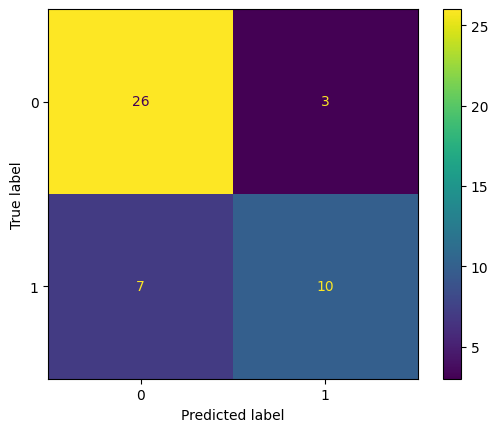

In [213]:
ConfusionMatrixDisplay(confusion_matrix(y_test,prediction_1)).plot()